Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

# Signal quality

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from systole import import_ppg
from systole.detection import oxi_peaks, missed_beat, artifact_removal, hrv_subspaces
from systole.hrv import rmssd
from adtk.data import validate_series
from adtk.pipe import Pipeline
from adtk.detector import ThresholdAD
from adtk.transformer import RollingAggregate
from adtk.visualization import plot

In [91]:
# Load data
oxi = import_ppg('Noisy1')[0, :]

# To Panda DataFrame
time = pd.to_datetime(np.arange(0, len(oxi))/75, unit='ms')
df = pd.DataFrame({'oxi': oxi}, index=time)
df = validate_series(df.oxi)

Here, we use the [Anomalie Detection Toolkit](https://arundo-adtk.readthedocs-hosted.com/en/latest/index.html) to detect significant changes of the signal basic statistics to select relevant segment of the recording. The pipeline has three steps:
1. Compute the standard deviation using a sliding window.
2. Compute the median of this standar deviation using another sliding window.
3. Threshold selection using 20 as arbitrary value.

In [108]:
steps = [
    ("standard_deviation", RollingAggregate(agg="std", window=200, center=True)),
    ("median", RollingAggregate(agg="median", window=600, center=False)),
    ("threshold", ThresholdAD(low=20))
]
pipeline = Pipeline(steps)

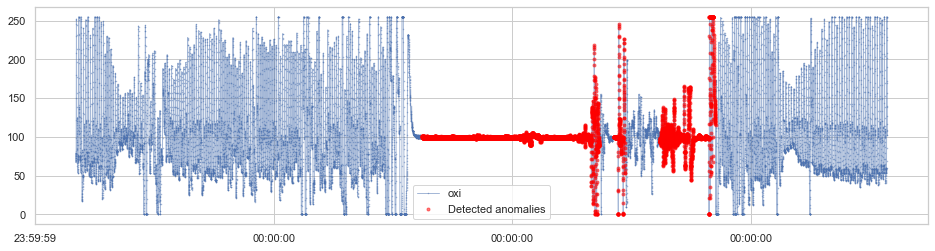

In [109]:
anomalies = pipeline.fit_detect(df)
plot(df, anomaly_pred=anomalies, ts_linewidth=1, ap_marker_on_curve=True, ap_color='red')

The seleted signal is then passed to the heart rate variability pipeline.

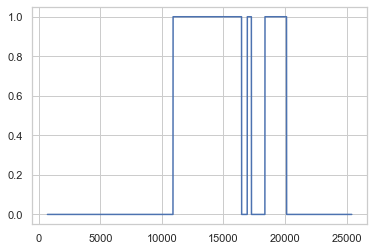

In [8]:
plt.plot(boll)

In [88]:
# Extract peak vectors
signal, peaks = oxi_peaks(oxi)

In [32]:
np.where(np.diff()[0]==1)[0]

array([    0,     1,     2, ..., 17855, 17856, 17857], dtype=int64)

In [128]:
oxi.ndim

1

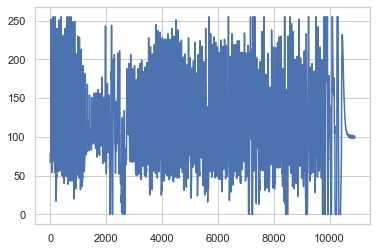

In [133]:
plt.plot(signal_quality(oxi))

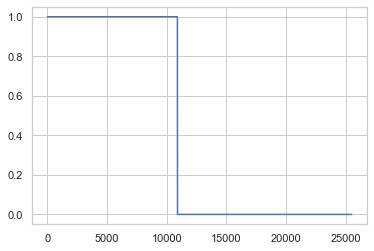

In [124]:
plt.plot(out)

In [125]:
out

array([ True,  True,  True, ..., False, False, False])

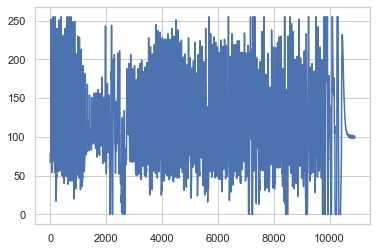

In [126]:
plt.plot(oxi[out])